In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

cat_train_path = "/content/train/"
cat_test_path = "/content/test/"

In [26]:
cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [27]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (2193, 128, 128, 3)
cat_test (1011, 128, 128, 3)


In [28]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

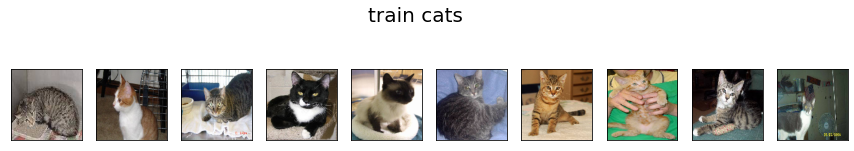

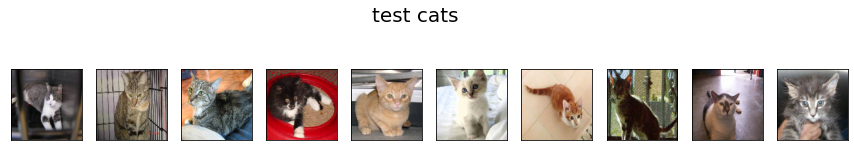

In [29]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

In [30]:
input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [31]:
cat_AE = Model(input_layer, output_layer)
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         584 

In [32]:
cat_AE.fit(cat_train, cat_train,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_data=(cat_test, cat_test))

Epoch 1/30
69/69 [==============================] - 2s 25ms/step - loss: 3376.8643 - val_loss: 1335.9855
Epoch 2/30
69/69 [==============================] - 1s 19ms/step - loss: 1078.3057 - val_loss: 971.8433
Epoch 3/30
69/69 [==============================] - 1s 19ms/step - loss: 898.7148 - val_loss: 871.9783
Epoch 4/30
69/69 [==============================] - 1s 19ms/step - loss: 835.5944 - val_loss: 822.6039
Epoch 5/30
69/69 [==============================] - 1s 19ms/step - loss: 774.2285 - val_loss: 737.7012
Epoch 6/30
69/69 [==============================] - 1s 19ms/step - loss: 694.1222 - val_loss: 678.9051
Epoch 7/30
69/69 [==============================] - 1s 19ms/step - loss: 655.7213 - val_loss: 646.3016
Epoch 8/30
69/69 [==============================] - 1s 19ms/step - loss: 632.0712 - val_loss: 621.7883
Epoch 9/30
69/69 [==============================] - 1s 19ms/step - loss: 613.0551 - val_loss: 607.9089
Epoch 10/30
69/69 [==============================] - 1s 19ms/step - lo

In [33]:
cat_AE.save("model_saving_Cat_AE.h5")

In [34]:
get_encoded_cat = Model(inputs=cat_AE.input, outputs=cat_AE.get_layer("CODE").output)

In [35]:
encoded_cat = get_encoded_cat.predict(cat_test)
encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

(1011, 2048)

In [36]:
reconstructed_cats = cat_AE.predict(cat_test)

In [37]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

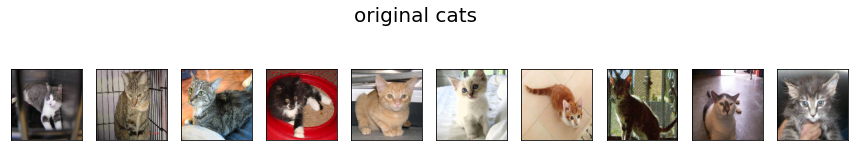

In [38]:
show_cat_data(cat_test, title="original cats")

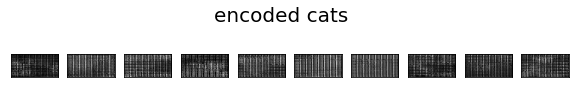

In [39]:
show_data(encoded_cat, height=32, width=64, title="encoded cats")

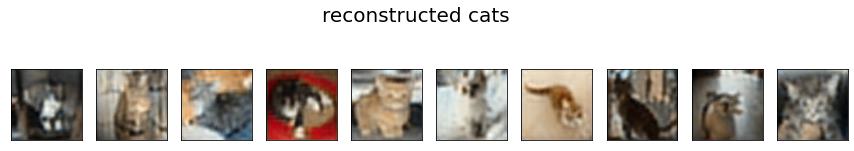

In [40]:
show_cat_data(reconstructed_cats, title="reconstructed cats")